#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2017





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.72G/1.72G [00:45<00:00, 38.4MB/s]
100% 1.72G/1.72G [00:45<00:00, 40.2MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2017.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2017.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2017.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2017.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'#SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df7 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2017.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df16 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2017.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (7,20,22,23,24,25,26,27,30,32,34,41,46,48,50) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
pd.set_option('display.max_columns', 50)
df7

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,1,1,2017,"960,75",F,2015.0,"0,00","100,00","36269,70",09/01/1986,N,S,Masculino,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,2,1,2017,"960,75",F,2015.0,"0,00","100,00","36269,70",09/01/1986,N,S,Masculino,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,230,2321414,Banco do Brasil,3,1,2017,"960,75",F,2015.0,"0,00","100,00","36269,70",09/01/1986,N,S,Masculino,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,4
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,234,2321414,Banco do Brasil,4,1,2017,"960,75",F,2015.0,"0,00","100,00","36269,70",09/01/1986,N,S,Masculino,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,238,2321414,Banco do Brasil,5,1,2017,"960,75",F,2015.0,"0,00","100,00","36269,70",09/01/1986,N,S,Masculino,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071906,TO,Porto Nacional,NaN,242,2288006,Banco do Brasil,6,1,2017,"773,65",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7
8071907,TO,Porto Nacional,NaN,242,2611274,Banco do Brasil,6,1,2017,"858,25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7
8071908,TO,Porto Nacional,NaN,242,2573941,Banco do Brasil,6,1,2017,"983,89",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7
8071909,TO,Porto Nacional,NaN,242,2628746,Caixa Econômica Federal,6,1,2017,"957,64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7


In [ ]:
pd.set_option('display.max_columns', 50)
df16

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,9,2,2017,"1085,33",F,2015.0,"0,00","100,00","30402,00",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,8,2,2017,"1085,33",F,2015.0,"0,00","100,00","30402,00",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,7,2,2017,"1085,33",F,2015.0,"0,00","100,00","30402,00",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,257,2403582,Banco do Brasil,10,2,2017,"1085,33",F,2015.0,"0,00","100,00","30402,00",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,11
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,259,2403582,Banco do Brasil,11,2,2017,"1085,33",F,2015.0,"0,00","100,00","30402,00",08/10/1975,N,S,Masculino,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712020,TO,Porto Nacional,NaN,259,2485537,Caixa Econômica Federal,11,2,2017,"898,71",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12
5712021,TO,Porto Nacional,NaN,259,2785226,Caixa Econômica Federal,11,2,2017,"1797,73",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12
5712022,TO,Porto Nacional,NaN,259,2676561,Caixa Econômica Federal,11,2,2017,"4455,56",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12
5712023,TO,Porto Nacional,NaN,259,2794370,Caixa Econômica Federal,11,2,2017,"757,09",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2017.1

###Retirando as repetições

In [ ]:
repeticoes = df7['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df7['MESES_CONSEDIDOS'] = df7.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df7

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,1,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,2,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,230,2321414,Banco do Brasil,3,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,234,2321414,Banco do Brasil,4,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,238,2321414,Banco do Brasil,5,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071906,TO,Porto Nacional,NaN,242,2288006,Banco do Brasil,6,1,2017,"773,65",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071907,TO,Porto Nacional,NaN,242,2611274,Banco do Brasil,6,1,2017,"858,25",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071908,TO,Porto Nacional,NaN,242,2573941,Banco do Brasil,6,1,2017,"983,89",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071909,TO,Porto Nacional,NaN,242,2628746,Caixa Econômica Federal,6,1,2017,"957,64",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6


In [ ]:
df7DuplicateRows = df7[df7.duplicated(subset='CO_CONTRATO_FIES')]
df7DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,2,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,230,2321414,Banco do Brasil,3,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,4,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,234,2321414,Banco do Brasil,4,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,5,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,238,2321414,Banco do Brasil,5,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,242,2321414,Banco do Brasil,6,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071906,TO,Porto Nacional,NaN,242,2288006,Banco do Brasil,6,1,2017,"773,65",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071907,TO,Porto Nacional,NaN,242,2611274,Banco do Brasil,6,1,2017,"858,25",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071908,TO,Porto Nacional,NaN,242,2573941,Banco do Brasil,6,1,2017,"983,89",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6
8071909,TO,Porto Nacional,NaN,242,2628746,Caixa Econômica Federal,6,1,2017,"957,64",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,7,6


In [ ]:
df7ComLinhasDuplicads = df7
df7 = df7.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df7

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2321414,Banco do Brasil,1,1,2017,"960,75",...,Solteiro,Negro,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,3,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,1871333,Banco do Brasil,2,1,2017,"1157,08",...,Divorciado,Branco,"100,00",8.0,DIREITO,Bacharelado,Anual,2017,3,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,2403582,Banco do Brasil,1,1,2017,"1006,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,3,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,224,2004941,Banco do Brasil,8,2,2016,"434,00",...,Separado,Pardo,"100,00",8.0,ADMINISTRAÇÃO,Bacharelado,Anual,2017,2,24
30,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,228,1410948,Banco do Brasil,1,1,2017,"1157,08",...,Solteiro,Pardo,"100,00",9.0,DIREITO,Bacharelado,Anual,2017,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071761,TO,Porto Nacional,NaN,238,2765601,Caixa Econômica Federal,1,1,2017,"1751,02",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,6
8071768,TO,Porto Nacional,NaN,238,2764482,Banco do Brasil,1,1,2017,"952,21",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,6
8071790,TO,Porto Nacional,NaN,238,2769990,Caixa Econômica Federal,1,1,2017,"4937,63",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,6
8071797,TO,Porto Nacional,NaN,238,2583293,Banco do Brasil,1,1,2017,"1956,36",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,6


In [ ]:
df7ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

251914     60
2163124    48
2632103    42
1079060    42
2691564    42
           ..
2462286     1
1450130     1
2188638     1
1190690     1
1504670     1
Name: CO_CONTRATO_FIES, Length: 1240525, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df7.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.240525e+06,1.240525e+06,1.240525e+06,1.240525e+06,1.240525e+06,1.102856e+06,1.102862e+06,1240525.0,1.240525e+06,1.240525e+06
mean,2.317627e+02,1.882846e+06,2.515790e+00,1.067551e+00,2.016882e+03,2.014248e+03,8.995183e+00,2017.0,4.152235e+00,6.506851e+00
std,4.273585e+00,6.233141e+05,2.207076e+00,2.509743e-01,4.364781e-01,1.260336e+00,1.620707e+00,0.0,1.194833e+00,1.809734e+00
min,2.240000e+02,1.112550e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.006000e+03,1.000000e+00,2017.0,2.000000e+00,1.000000e+00
25%,2.280000e+02,1.439566e+06,1.000000e+00,1.000000e+00,2.017000e+03,2.013000e+03,8.000000e+00,2017.0,3.000000e+00,6.000000e+00
50%,2.310000e+02,1.978647e+06,2.000000e+00,1.000000e+00,2.017000e+03,2.014000e+03,1.000000e+01,2017.0,4.000000e+00,6.000000e+00
75%,2.340000e+02,2.417033e+06,3.000000e+00,1.000000e+00,2.017000e+03,2.015000e+03,1.000000e+01,2017.0,5.000000e+00,6.000000e+00
max,2.430000e+02,2.772621e+06,1.200000e+01,2.000000e+00,2.017000e+03,2.017000e+03,1.700000e+01,2017.0,7.000000e+00,6.000000e+01


In [ ]:
df7.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   137804
NU_PERCENTUAL_PROUNI              137786
DS_PERIODICIDADE_CUR              137781
NU_ANO_EXERCICIO_INSC             137669
VL_PERC_FINANCIAMENTO             137667
NU_PERCENT_SOLICITADO_FINANC      137667
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    137664
ST_DEFICIENCIA                    137664
DT_NASCIMENTO                     137664
DS_RACA_COR                       137664
DS_SEXO                           137664
TP_FIANCA                         137663
QT_SEMESTRE_FINANCIADO            137663
DS_CURSO                          137663
DS_TIPO_CURSO                     137663
NO_IES                            137663
VL_REPASSE                        137663
NU_ANO_PROC                            0
NU_MES_PROC                            0
#SG_UF                                 0
NO_MUNICIPIO                           0
VL_MENSALIDADE                         0
NU_ANO                                 0
NU_SEMESTRE                            0
NU_MES          

In [ ]:
df7.dropna(axis=0, inplace=True)

In [ ]:
df7.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df7.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.102478e+06,1.102478e+06,1.102478e+06,1.102478e+06,1.102478e+06,1.102478e+06,1.102478e+06,1102478.0,1.102478e+06,1.102478e+06
mean,2.317608e+02,1.816816e+06,2.580028e+00,1.072963e+00,2.016872e+03,2.014248e+03,8.995337e+00,2017.0,4.142585e+00,6.560017e+00
std,4.326782e+00,6.068440e+05,2.264919e+00,2.600757e-01,4.526015e-01,1.260355e+00,1.620639e+00,0.0,1.209321e+00,1.889431e+00
min,2.240000e+02,1.112550e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.006000e+03,1.000000e+00,2017.0,2.000000e+00,1.000000e+00
25%,2.280000e+02,1.382386e+06,1.000000e+00,1.000000e+00,2.017000e+03,2.013000e+03,8.000000e+00,2017.0,3.000000e+00,6.000000e+00
50%,2.310000e+02,1.901655e+06,2.000000e+00,1.000000e+00,2.017000e+03,2.014000e+03,1.000000e+01,2017.0,4.000000e+00,6.000000e+00
75%,2.350000e+02,2.324879e+06,3.000000e+00,1.000000e+00,2.017000e+03,2.015000e+03,1.000000e+01,2017.0,5.000000e+00,6.000000e+00
max,2.430000e+02,2.772621e+06,1.200000e+01,2.000000e+00,2.017000e+03,2.017000e+03,1.700000e+01,2017.0,7.000000e+00,6.000000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df7['REGIAO'] = df7['#SG_UF']

In [ ]:
df7['REGIAO']= df7['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df7['REGIAO']= df7['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df7['REGIAO']= df7['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df7['REGIAO']= df7['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df7['REGIAO']= df7['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df7['CATEGORIA_CIENCIA_CURSO'] = df7['DS_CURSO']

In [ ]:
df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS',
'GESTÃO FISCAL E TRIBUTÁRIA', 'CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS'
], 
'Ciências Sociais Aplicadas')


df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS', 'REFRIGERAÇÃO E CLIMATIZAÇÃO', 'SOLDAGEM', 'TECNÓLOGO EM METALURGIA'
], 
'Ciências Exatas e da Terra')

df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA',
'VITICULTURA E ENOLOGIA'
], 
'Ciências Agrárias')

df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA', 'FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃO BÁSICA E PROFISSIONAL',
'GEOPROCESSAMENTO'
], 
'Ciências Humanas')

df7['CATEGORIA_CIENCIA_CURSO']= df7['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS', 'DECORAÇÃO & DESIGN', 'LETRAS - PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df7['VL_REPASSE'] = df7['VL_REPASSE'].astype('str')
df7['VL_REPASSE'] = df7['VL_REPASSE'].str.replace(',', '.')
df7['VL_REPASSE']  = pd.to_numeric(df7['VL_REPASSE'], errors='coerce')

df7['VL_MENSALIDADE'] = df7['VL_MENSALIDADE'].astype('str')
df7['VL_MENSALIDADE'] = df7['VL_MENSALIDADE'].str.replace(',', '.')
df7['VL_MENSALIDADE']  = pd.to_numeric(df7['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df7['VALOR_SEMESTRE_PAGO'] = np.where(df7['MESES_CONSEDIDOS'] > 6,
                                           df7['VL_MENSALIDADE'] * 6,
                                           df7['VL_MENSALIDADE'] * df7['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df7['VALOR_ARQUIVO_PAGO'] = df7['VL_MENSALIDADE'] * df7['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df7['MESES_CONSEDIDOS'].value_counts()

6     993979
12     93327
18      4468
4       3239
5       3211
3       1372
14       786
8        534
2        344
10       318
11       296
24       224
9        139
30        76
16        42
36        35
20        25
17        20
42         8
15         8
7          7
1          7
13         4
23         2
60         1
38         1
28         1
19         1
21         1
22         1
48         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df7['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df7['VL_REPASSE'] - df7['VALOR_ARQUIVO_PAGO']

In [ ]:
df7["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00        2612
0.04        1056
0.01         804
0.05         776
0.03         750
            ... 
10595.36       1
9571.76        1
10825.60       1
9065.40        1
10167.48       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 863146, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2017.2

###Retirando as repetições

In [ ]:
repeticoes = df16['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df16['MESES_CONSEDIDOS'] = df16.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df16

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,9,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,8,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,7,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,257,2403582,Banco do Brasil,10,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,11,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,259,2403582,Banco do Brasil,11,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712020,TO,Porto Nacional,NaN,259,2485537,Caixa Econômica Federal,11,2,2017,"898,71",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712021,TO,Porto Nacional,NaN,259,2785226,Caixa Econômica Federal,11,2,2017,"1797,73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712022,TO,Porto Nacional,NaN,259,2676561,Caixa Econômica Federal,11,2,2017,"4455,56",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712023,TO,Porto Nacional,NaN,259,2794370,Caixa Econômica Federal,11,2,2017,"757,09",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5


In [ ]:
df16DuplicateRows = df16[df16.duplicated(subset='CO_CONTRATO_FIES')]
df16DuplicateRows

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,8,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,7,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,257,2403582,Banco do Brasil,10,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,11,5
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,259,2403582,Banco do Brasil,11,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,12,5
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,860597,Banco do Brasil,9,2,2017,"1175,72",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712020,TO,Porto Nacional,NaN,259,2485537,Caixa Econômica Federal,11,2,2017,"898,71",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712021,TO,Porto Nacional,NaN,259,2785226,Caixa Econômica Federal,11,2,2017,"1797,73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712022,TO,Porto Nacional,NaN,259,2676561,Caixa Econômica Federal,11,2,2017,"4455,56",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712023,TO,Porto Nacional,NaN,259,2794370,Caixa Econômica Federal,11,2,2017,"757,09",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5


In [ ]:
df16ComLinhasDuplicads = df16
df16 = df16.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df16

,#SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,2403582,Banco do Brasil,9,2,2017,"1085,33",...,Solteiro,Pardo,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,860597,Banco do Brasil,7,2,2017,"1175,72",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
10,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,1390051,Caixa Econômica Federal,8,2,2017,"978,00",...,Casado,Pardo,"100,00",9.0,PSICOLOGIA,Bacharelado,Anual,2017,10,5
15,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,257,879998,Banco do Brasil,10,2,2017,"793,30",...,Solteiro,Pardo,"100,00",10.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2017,11,5
20,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,255,1567557,Banco do Brasil,7,2,2017,"994,84",...,Solteiro,Branco,"100,00",10.0,DIREITO,Bacharelado,Anual,2017,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711908,TO,Porto Nacional,NaN,259,2750684,Caixa Econômica Federal,7,2,2017,"4455,56",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5711951,TO,Porto Nacional,NaN,259,2717279,Banco do Brasil,7,2,2017,"948,71",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5711980,TO,Porto Nacional,NaN,259,2648020,Caixa Econômica Federal,11,2,2017,"1007,87",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5
5712008,TO,Porto Nacional,NaN,259,2288007,Banco do Brasil,11,2,2017,"1152,31",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,5


In [ ]:
df16ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

144357     60
2790693    54
314214     54
2776360    53
836235     50
           ..
503216      1
426858      1
2295863     1
984355      1
2307127     1
Name: CO_CONTRATO_FIES, Length: 1076720, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df16.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.076720e+06,1.076720e+06,1.076720e+06,1.076720e+06,1.076720e+06,859752.000000,859755.000000,1076720.0,1.076720e+06,1.076720e+06
mean,2.554704e+02,1.975938e+06,8.069421e+00,1.978727e+00,2.016884e+03,2014.363432,9.110847,2017.0,1.034661e+01,5.305024e+00
std,3.052656e+00,6.002143e+05,1.425728e+00,1.442928e-01,4.753531e-01,1.192079,1.534277,0.0,8.383708e-01,1.509819e+00
min,2.440000e+02,1.113040e+05,1.000000e+00,1.000000e+00,2.010000e+03,2002.000000,1.000000,2017.0,8.000000e+00,1.000000e+00
25%,2.550000e+02,1.534120e+06,7.000000e+00,2.000000e+00,2.017000e+03,2014.000000,8.000000,2017.0,1.000000e+01,5.000000e+00
50%,2.560000e+02,2.080064e+06,8.000000e+00,2.000000e+00,2.017000e+03,2014.000000,10.000000,2017.0,1.000000e+01,5.000000e+00
75%,2.570000e+02,2.485790e+06,9.000000e+00,2.000000e+00,2.017000e+03,2015.000000,10.000000,2017.0,1.100000e+01,5.000000e+00
max,2.630000e+02,2.824929e+06,1.200000e+01,2.000000e+00,2.017000e+03,2017.000000,26.000000,2017.0,1.200000e+01,6.000000e+01


In [ ]:
df16.isnull().sum().sort_values(ascending=False)

NU_PERCENTUAL_PROUNI              217057
DS_ESTADO_CIVIL                   217054
DS_PERIODICIDADE_CUR              217041
NU_ANO_EXERCICIO_INSC             216968
VL_PERC_FINANCIAMENTO             216967
NU_PERCENT_SOLICITADO_FINANC      216967
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    216965
ST_DEFICIENCIA                    216965
DT_NASCIMENTO                     216965
DS_RACA_COR                       216965
VL_REPASSE                        216965
TP_FIANCA                         216965
QT_SEMESTRE_FINANCIADO            216965
DS_CURSO                          216965
DS_TIPO_CURSO                     216965
NO_IES                            216965
DS_SEXO                           216965
NU_ANO_PROC                            0
NU_MES_PROC                            0
#SG_UF                                 0
NO_MUNICIPIO                           0
VL_MENSALIDADE                         0
NU_ANO                                 0
NU_SEMESTRE                            0
NU_MES          

In [ ]:
df16.dropna(axis=0, inplace=True)

In [ ]:
df16.isnull().sum().sort_values(ascending=False)

#SG_UF                            0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df16.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,859495.000000,8.594950e+05,859495.000000,859495.000000,859495.000000,859495.000000,859495.000000,859495.0,859495.000000,859495.000000
mean,255.357344,1.876620e+06,8.136838,1.974909,2016.859009,2014.363440,9.110962,2017.0,10.325388,5.372039
std,3.180039,5.616364e+05,1.454136,0.156403,0.519535,1.192098,1.534234,0.0,0.857586,1.660614
min,244.000000,1.113040e+05,1.000000,1.000000,2010.000000,2002.000000,1.000000,2017.0,8.000000,1.000000
25%,255.000000,1.477524e+06,7.000000,2.000000,2017.000000,2014.000000,8.000000,2017.0,10.000000,5.000000
50%,255.000000,1.942695e+06,8.000000,2.000000,2017.000000,2014.000000,10.000000,2017.0,10.000000,5.000000
75%,257.000000,2.327862e+06,9.000000,2.000000,2017.000000,2015.000000,10.000000,2017.0,11.000000,5.000000
max,263.000000,2.824929e+06,12.000000,2.000000,2017.000000,2017.000000,26.000000,2017.0,12.000000,60.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df16['REGIAO'] = df16['#SG_UF']

In [ ]:
df16['REGIAO']= df16['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df16['REGIAO']= df16['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df16['REGIAO']= df16['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df16['REGIAO']= df16['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df16['REGIAO']= df16['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df16['CATEGORIA_CIENCIA_CURSO'] = df16['DS_CURSO']

In [ ]:
df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS',
'GESTÃO FISCAL E TRIBUTÁRIA', 'CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS'
], 
'Ciências Sociais Aplicadas')


df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS', 'REFRIGERAÇÃO E CLIMATIZAÇÃO', 'SOLDAGEM', 'TECNÓLOGO EM METALURGIA'
], 
'Ciências Exatas e da Terra')

df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA',
'VITICULTURA E ENOLOGIA'
], 
'Ciências Agrárias')

df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA', 'FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃO BÁSICA E PROFISSIONAL',
'GEOPROCESSAMENTO'
], 
'Ciências Humanas')

df16['CATEGORIA_CIENCIA_CURSO']= df16['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS', 'DECORAÇÃO & DESIGN', 'LETRAS - PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df16['VL_REPASSE'] = df16['VL_REPASSE'].astype('str')
df16['VL_REPASSE'] = df16['VL_REPASSE'].str.replace(',', '.')
df16['VL_REPASSE']  = pd.to_numeric(df16['VL_REPASSE'], errors='coerce')

df16['VL_MENSALIDADE'] = df16['VL_MENSALIDADE'].astype('str')
df16['VL_MENSALIDADE'] = df16['VL_MENSALIDADE'].str.replace(',', '.')
df16['VL_MENSALIDADE']  = pd.to_numeric(df16['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df16['VALOR_SEMESTRE_PAGO'] = np.where(df16['MESES_CONSEDIDOS'] > 6,
                                           df16['VL_MENSALIDADE'] * 6,
                                           df16['VL_MENSALIDADE'] * df16['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df16['VALOR_ARQUIVO_PAGO'] = df16['VL_MENSALIDADE'] * df16['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df16['MESES_CONSEDIDOS'].value_counts()

5     778360
11     37569
6      36492
4       1323
12      1168
3        782
17       770
14       467
18       329
20       279
24       257
8        236
26       188
37       164
9        149
2        149
30       148
10       134
32       115
23        93
1         63
29        48
36        41
15        25
41        23
13        21
35        20
43        17
31        15
42         9
47         8
38         7
7          6
48         4
16         3
54         2
25         2
19         2
22         1
53         1
60         1
28         1
40         1
50         1
27         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df16['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df16['VL_REPASSE'] - df16['VALOR_ARQUIVO_PAGO']

In [ ]:
df16["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00        556
34583.38    311
38316.88    271
40930.89    211
25776.28    196
           ... 
854.89        1
857.26        1
1502.19       1
4666.83       1
1112.23       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 672159, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2017.1

##Analisando os valores por estado.

In [ ]:
df7['#SG_UF'].value_counts()

SP    309299
MG    138706
RJ     87097
BA     76079
RS     50105
PR     43006
CE     40682
MT     40104
PE     39515
DF     32639
PB     31060
GO     28311
SC     24200
PA     18749
RN     17163
MA     16752
AM     16426
PI     15866
SE     15060
ES     14907
RO      9514
AP      8333
MS      7843
AC      7674
AL      7432
RR      3675
TO      2281
Name: #SG_UF, dtype: int64

In [ ]:
df7_estados_interativo = df7['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df7_estados_interativo.index,
               y=df7_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df7.REGIAO.value_counts()

SUDESTE         550009
NORDESTE        259609
SUL             117311
CENTRO-OESTE    108897
NORTE            66652
Name: REGIAO, dtype: int64

In [ ]:
df7_regiao_interativo = df7.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_regiao_interativo.index,
               y=df7_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 346)
df7.DS_CURSO.value_counts()

DIREITO                                              196967
ENGENHARIA CIVIL                                      97732
ENFERMAGEM                                            89101
PSICOLOGIA                                            68999
ADMINISTRAÇÃO                                         64937
                                                      ...  
ARTE: HISTÓRIA, CRÍTICA E CURADORIA                       1
BIOTECNOLOGIA INDUSTRIAL                                  1
ESTILISMO                                                 1
COMUNICAÇÃO ASSISTIVA                                     1
CIENCIAS CONTÁBEIS - ÊNFASE EM POLÍTICAS PÚBLICAS         1
Name: DS_CURSO, Length: 346, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df7_curso_interativo = df7.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df7_curso_interativo.index,
               y=df7_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df7.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     393556
Ciências da Saúde              314777
Engenharias                    213921
Ciências Humanas               104401
Ciências Agrárias               31985
Ciências Exatas e da Terra      24868
Linguística, Letras e Artes     10161
Ciências Biológicas              8809
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

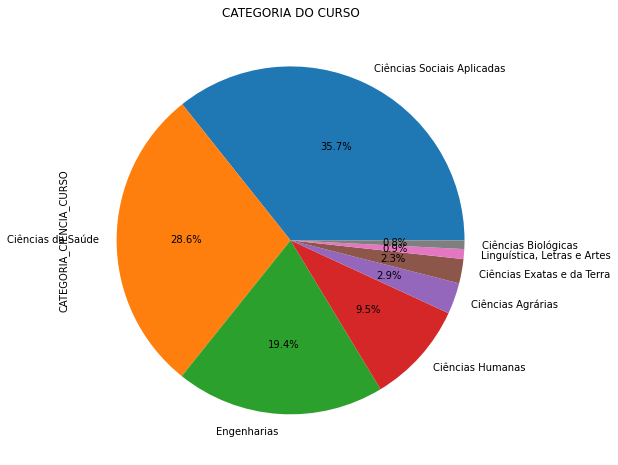

In [ ]:
plot = df7['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df7.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    828368
N    202585
P     71525
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

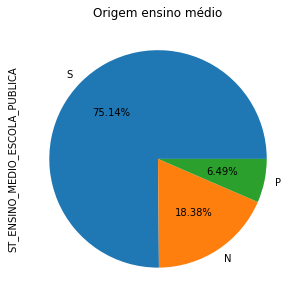

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df7['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df7['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df7.DS_SEXO.value_counts()

Feminino     666771
Masculino    435707
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

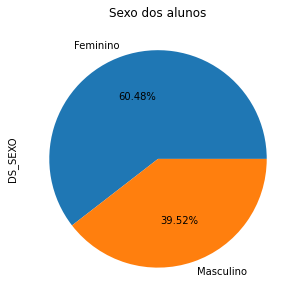

In [ ]:
plot = df7['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1656)
df7.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                     49065
UNIVERSIDADE ESTÁCIO DE SÁ                                37084
Centro Universitário Estácio do Ceará                     14147
UNIVERSIDADE NOVE DE JULHO                                12479
UNIVERSIDADE DE CUIABÁ                                    11037
                                                          ...  
FACULDADE SENAC SÃO MIGUEL DO OESTE                           1
FACULDADE DE CIÊNCIAS HUMANAS DO VALE DO RIO GRANDE           1
FACULDADE DE CIÊNCIAS GERENCIAIS PADRE ARNALDO JANSSEN        1
FACULDADE TRÊS MARIAS                                         1
FACULDADE DE MONTE ALTO                                       1
Name: NO_IES, Length: 1656, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 495)
df7.NO_MUNICIPIO.value_counts()

São Paulo         154308
Belo Horizonte     90930
Valinhos           76844
Rio de Janeiro     63408
Salvador           45425
                   ...  
Açailândia             1
Junqueirópolis         1
Monte Alto             1
Ibiporã                1
Tupi Paulista          1
Name: NO_MUNICIPIO, Length: 495, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df7.ST_DEFICIENCIA.value_counts()

N    1096500
S       5978
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

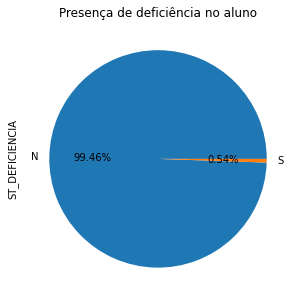

In [ ]:
plot = df7['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df7.DS_RACA_COR.value_counts()

Branco     485739
Pardo      466264
Negro      122984
Amarelo     25125
Índio        2366
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

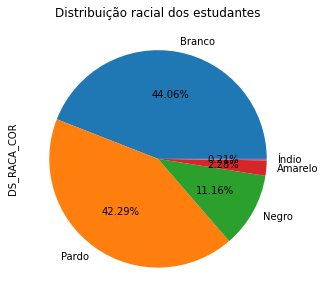

In [ ]:
plot = df7['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df7.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    626232
Banco do Brasil            476246
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

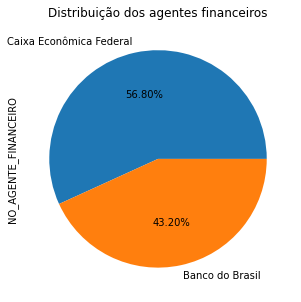

In [ ]:
plot = df7['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df7.DS_ESTADO_CIVIL.value_counts()

Solteiro         908619
Casado           135369
União estável     28061
Divorciado        22246
Separado           6690
Viúvo              1493
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

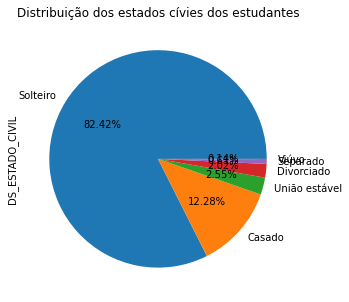

In [ ]:
plot = df7['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df7.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1073893
Anual           27771
Trimestral        814
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

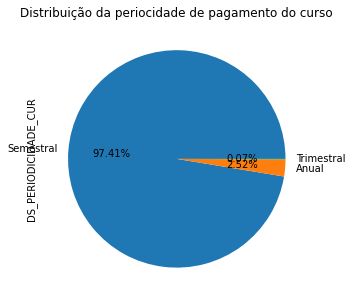

In [ ]:
plot = df7['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df7.NU_ANO_PROC.value_counts()

2017    1102478
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df7ComLinhasDuplicads.NU_MES_PROC.value_counts()

6    2278210
5    2075147
4    1359060
7    1297589
3     812259
2     249646
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

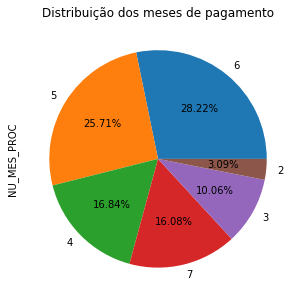

In [ ]:
plot = df7ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df7ComLinhasDuplicads.NU_MES.value_counts()

1     1197059
2     1197059
3     1196646
4     1194971
5     1191077
6     1187156
11     151969
12     151718
9      151113
8      151076
7      151076
10     150991
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

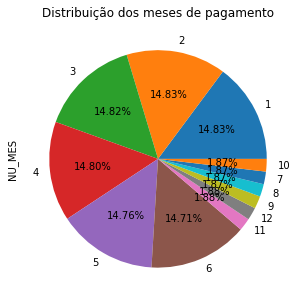

In [ ]:
plot = df7ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df7.NU_SEMESTRE.value_counts()

1    1022038
2      80440
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

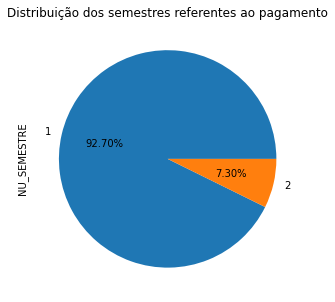

In [ ]:
plot = df7['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df7ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    7163968
2     907943
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

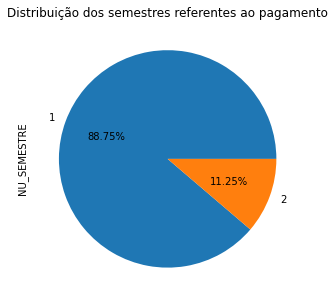

In [ ]:
plot = df7ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df7ComLinhasDuplicads.NU_ANO.value_counts()

2017    7084213
2015     694647
2016     286377
2014       4011
2013       1265
2012        732
2011        498
2010        168
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

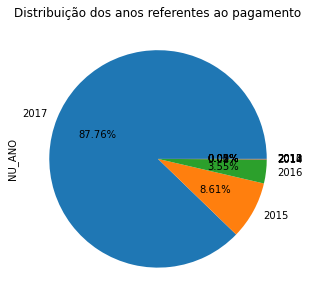

In [ ]:
plot = df7ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df7.TP_FIANCA.value_counts()

F    795184
N    299003
S      8291
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

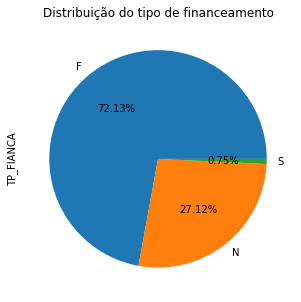

In [ ]:
plot = df7['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df7.DS_TIPO_CURSO.value_counts()

Bacharelado     1011032
Licenciatura      61383
Tecnológico       30063
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

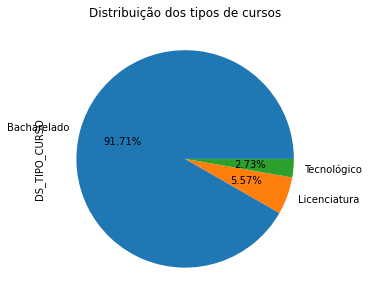

In [ ]:
plot = df7['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df7.CO_PROCESSO.value_counts()

228    249515
234    169378
230    143872
235    113164
231     97917
229     87889
238     62148
224     51007
239     49402
241     37172
225     16304
242      9765
243      6800
232      4623
233      2963
226       271
236       174
227        68
237        46
Name: CO_PROCESSO, dtype: int64

In [ ]:
df7.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    417253
2013.0    213498
2015.0    206077
2016.0    131962
2012.0     67172
2017.0     58471
2011.0      7501
2010.0       523
2009.0        19
2006.0         1
2007.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df7.NU_PERCENTUAL_PROUNI.value_counts()

0,00     1078172
50,00      24305
25,00          1
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df7.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    740369
75,00      62626
50,00      56366
90,00      16680
95,00      14709
           ...  
17,00          5
13,00          3
7,00           2
11,00          2
8,00           1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 94, dtype: int64

In [ ]:
df7.VL_REPASSE.value_counts()

39190.88     291
42924.38     269
47945.89     209
62244.24     187
30383.78     181
            ... 
95475.58       1
33812.97       1
34827.50       1
123142.65      1
44064.14       1
Name: VL_REPASSE, Length: 849651, dtype: int64

In [ ]:
df7.VL_PERC_FINANCIAMENTO.value_counts()

100,00    740369
75,00      62626
50,00      56366
90,00      16680
95,00      14709
           ...  
17,00          5
13,00          3
7,00           2
11,00          2
8,00           1
Name: VL_PERC_FINANCIAMENTO, Length: 94, dtype: int64

In [ ]:
df7.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    532895
8.0     262734
9.0      88967
7.0      58560
6.0      51833
12.0     36351
11.0     25955
5.0      19555
4.0      16396
13.0      5019
3.0       2866
2.0        993
14.0       193
1.0         94
15.0        58
16.0         8
17.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df7.VL_REPASSE.sum()

46227252148.939995

In [ ]:
df7.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   12766580231.340
MG    6337511729.990
RJ    3598188507.920
BA    2983038082.230
RS    2585334915.960
MT    2141385295.990
PR    2045585110.720
CE    1726066672.570
DF    1405125403.030
PB    1321174354.450
PE    1230683045.610
GO    1144588294.570
SC    1119825773.810
ES     677517764.930
RN     654595313.100
PA     592860358.980
MA     556716608.900
SE     538654725.420
PI     523557858.090
AM     464918368.960
RO     428994017.630
AP     392603845.130
AC     343209222.330
MS     239126687.820
AL     223191247.570
RR     109536962.320
TO      76681749.570
Name: VL_REPASSE, dtype: float64

In [ ]:
df7_vl_estados_interativo = df7.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df7_vl_estados_interativo.index,
               y=df7_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df7.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        23379798234.180
NORDESTE        9757677907.940
SUL             5750745800.490
CENTRO-OESTE    4930225681.410
NORTE           2408804524.920
Name: VL_REPASSE, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             17713509892.860
Ciências Sociais Aplicadas    13398820243.880
Engenharias                    8856284806.510
Ciências Humanas               3362290982.150
Ciências Agrárias              1775831646.060
Ciências Exatas e da Terra      619847901.840
Linguística, Letras e Artes     284198369.820
Ciências Biológicas             216468305.820
Name: VL_REPASSE, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df7.VALOR_SEMESTRE_PAGO.sum()

7590733534.980001

In [ ]:
df7.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   2097230672.390
MG   1019398860.560
RJ    621824374.890
BA    487445438.310
RS    428733482.590
MT    344179980.000
PR    319023413.160
CE    277880138.260
DF    222992342.310
PB    218156276.820
PE    210619974.330
GO    182333160.640
SC    178260156.790
PA    117488774.940
RN    106403189.790
ES    104895780.730
MA     98213045.920
SE     88196441.940
PI     86167835.140
AM     82838556.700
RO     69160241.470
AP     65084305.040
AC     54806325.500
MS     39180837.550
AL     37114947.840
RR     19365446.900
TO     13739534.470
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df7_vl_estados_interativo = df7.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df7_vl_estados_interativo.index,
               y=df7_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df7.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3843349688.570
NORDESTE       1610197288.350
SUL             926017052.540
CENTRO-OESTE    788686320.500
NORTE           422483185.020
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2869748916.160
Ciências Sociais Aplicadas    2217947562.800
Engenharias                   1443373209.840
Ciências Humanas               563531885.440
Ciências Agrárias              294732635.880
Ciências Exatas e da Terra     113103828.310
Linguística, Letras e Artes     49588099.240
Ciências Biológicas             38707397.310
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df7.VALOR_ARQUIVO_PAGO.sum()

8339893005.9400015

In [ ]:
df7.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   2254695727.110
MG   1156496425.810
RJ    732470278.470
BA    537475754.540
RS    453423644.830
MT    405869858.000
PR    332939318.440
CE    293909218.600
PE    249269443.920
PB    236364274.690
DF    231237484.920
SC    189489967.290
GO    187818816.170
RN    128249837.580
PA    127775612.860
ES    109878427.990
MA    105994610.940
PI     94435630.010
AM     93692594.800
SE     92586310.390
AP     79048227.860
RO     71674233.710
AC     56650318.920
MS     40875991.030
AL     40751476.820
RR     22802117.310
TO     14017402.930
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df7_vl_estados_interativo = df7.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df7_vl_estados_interativo.index,
               y=df7_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df7.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        23379798234.180
NORDESTE        9757677907.940
SUL             5750745800.490
CENTRO-OESTE    4930225681.410
NORTE           2408804524.920
Name: VL_REPASSE, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             3131215522.720
Ciências Sociais Aplicadas    2445189954.250
Engenharias                   1592641724.850
Ciências Humanas               626881837.320
Ciências Agrárias              322286499.420
Ciências Exatas e da Terra     123922079.080
Linguística, Letras e Artes     55405551.230
Ciências Biológicas             42349837.070
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df7_vl_regiao_interativo = df7.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df7_vl_regiao_interativo.index,
               y=df7_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2017.2

##Analisando os valores por estado.

In [ ]:
df16['#SG_UF'].value_counts()

SP    252690
MG    106363
BA     59988
RJ     57954
RS     39278
PR     36090
CE     31735
MT     30601
PE     28110
DF     24977
PB     24546
GO     24150
SC     18714
MA     13572
PA     13557
AM     12357
PI     12302
RN     12199
ES     11943
SE     11897
RO      8043
MS      6409
AC      6221
AP      5910
AL      5615
RR      2562
TO      1712
Name: #SG_UF, dtype: int64

In [ ]:
df16_estados_interativo = df16['#SG_UF'].value_counts()

data_por_genero_interativo = [go.Bar(x=df16_estados_interativo.index,
               y=df16_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df16.REGIAO.value_counts()

SUDESTE         428950
NORDESTE        199964
SUL              94082
CENTRO-OESTE     86137
NORTE            50362
Name: REGIAO, dtype: int64

In [ ]:
df16_regiao_interativo = df16.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_regiao_interativo.index,
               y=df16_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 323)
df16.DS_CURSO.value_counts()

DIREITO                              160013
ENGENHARIA CIVIL                      78942
ENFERMAGEM                            71413
PSICOLOGIA                            55826
ADMINISTRAÇÃO                         48183
                                      ...  
COMUNICAÇÃO SOCIAL - EDITORAÇÃO           1
ARTES CÊNICAS                             1
COMUNICAÇÃO DAS ARTES DO CORPO            1
ANÁLISE DE SISTEMAS DE INFORMAÇÃO         1
ENGENHARIA DE ENERGIAS                    1
Name: DS_CURSO, Length: 323, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df16_curso_interativo = df16.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df16_curso_interativo.index,
               y=df16_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df16.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     305153
Ciências da Saúde              250730
Engenharias                    168139
Ciências Humanas                80309
Ciências Agrárias               26255
Ciências Exatas e da Terra      16419
Linguística, Letras e Artes      6619
Ciências Biológicas              5871
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

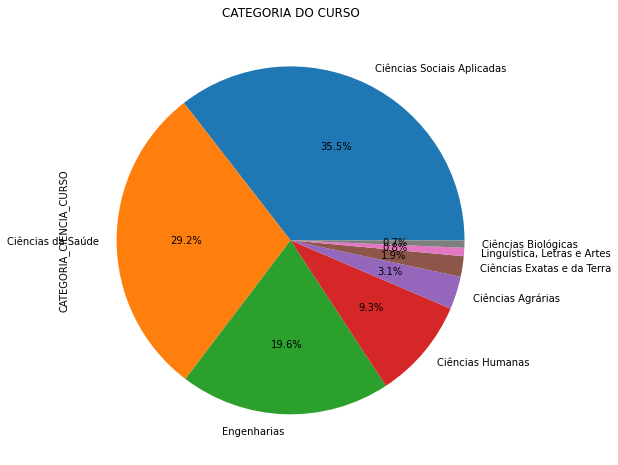

In [ ]:
plot = df16['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df16.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    647942
N    157304
P     54249
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

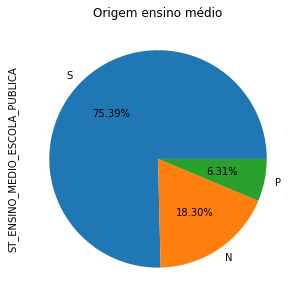

In [ ]:
plot = df16['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df16.DS_SEXO.value_counts()

Feminino     524064
Masculino    335431
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

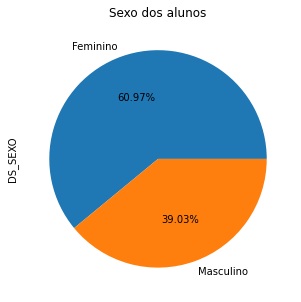

In [ ]:
plot = df16['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1683)
df16.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                          55373
UNIVERSIDADE ESTÁCIO DE SÁ                     23421
UNIVERSIDADE NOVE DE JULHO                     13511
Centro Universitário Estácio do Ceará           8668
UNIVERSIDADE ANHANGUERA DE SÃO PAULO            6890
                                               ...  
FACULDADE DE CIÊNCIAS CONTÁBEIS DE RECIFE          1
FACULDADE DA AMAZÔNIA DE PORTO VELHO               1
FACULDADE BRASILEIRA DE TECNOLOGIA-                1
FACULDADE CENECISTA DE VILA VELHA                  1
INSTITUTO SUPERIOR DE EDUCAÇÃO DE GUARATUBA        1
Name: NO_IES, Length: 1683, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 384)
df16.NO_MUNICIPIO.value_counts()

São Paulo                   136143
Belo Horizonte               66974
Valinhos                     53959
Rio de Janeiro               40662
Salvador                     35209
                             ...  
Itapevi                          1
Santa Luzia                      1
Lagarto                          1
Canindé de São Francisco         1
Junqueirópolis                   1
Name: NO_MUNICIPIO, Length: 493, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df16.ST_DEFICIENCIA.value_counts()

N    855001
S      4494
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

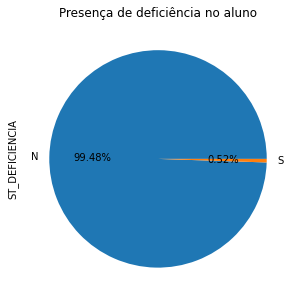

In [ ]:
plot = df16['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df16.DS_RACA_COR.value_counts()

Branco     385174
Pardo      360591
Negro       92478
Amarelo     19453
Índio        1799
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

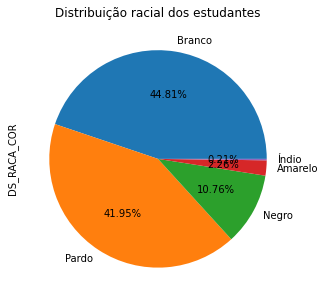

In [ ]:
plot = df16['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df16.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    483654
Banco do Brasil            375841
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

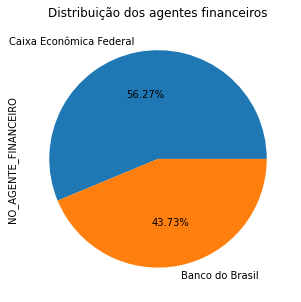

In [ ]:
plot = df16['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df16.DS_ESTADO_CIVIL.value_counts()

Solteiro         709429
Casado           104990
União estável     21629
Divorciado        17208
Separado           5128
Viúvo              1111
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

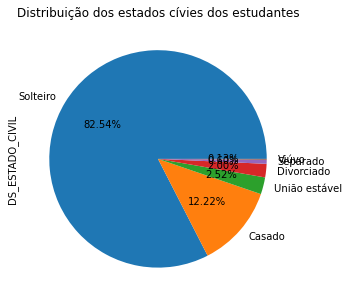

In [ ]:
plot = df16['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df16.DS_PERIODICIDADE_CUR.value_counts()

Semestral     835861
Anual          23195
Trimestral       439
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

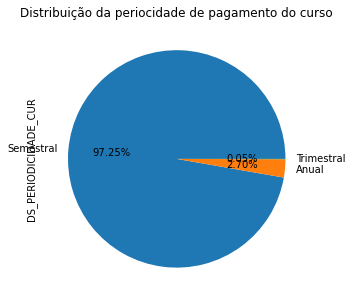

In [ ]:
plot = df16['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df16.NU_ANO_PROC.value_counts()

2017    859495
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df16ComLinhasDuplicads.NU_MES_PROC.value_counts()

10    1849881
11    1756761
12    1531747
9      502019
8       71617
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

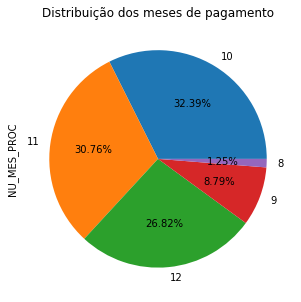

In [ ]:
plot = df16ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df16ComLinhasDuplicads.NU_MES.value_counts()

7     1096426
8     1096422
9     1096340
10    1095091
11    1092940
12      61687
6       29901
5       29860
4       28347
3       28339
2       28336
1       28336
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

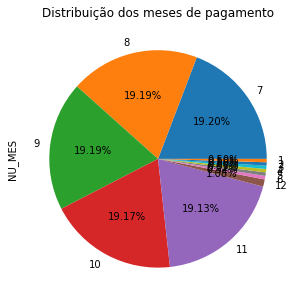

In [ ]:
plot = df16ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df16.NU_SEMESTRE.value_counts()

2    837929
1     21566
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

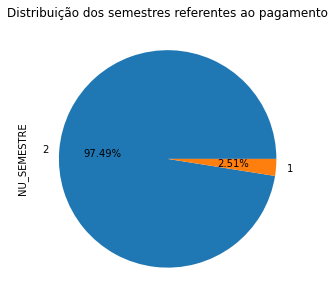

In [ ]:
plot = df16['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df16ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    5538906
1     173119
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

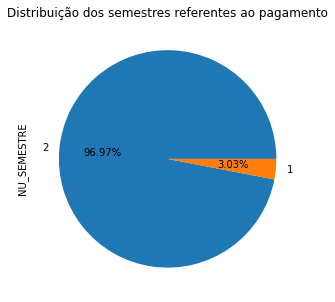

In [ ]:
plot = df16ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df16ComLinhasDuplicads.NU_ANO.value_counts()

2017    5272069
2015     384442
2016      30197
2014      22720
2013       1451
2012        618
2011        420
2010        108
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

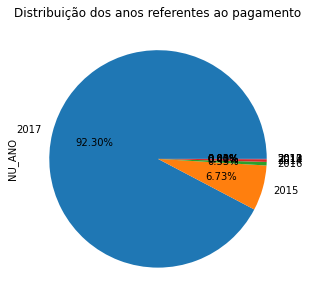

In [ ]:
plot = df16ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df16.TP_FIANCA.value_counts()

F    626548
N    227972
S      4975
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

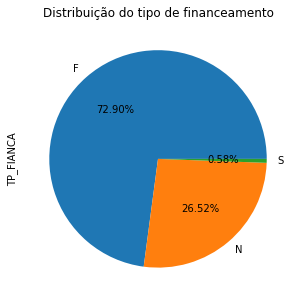

In [ ]:
plot = df16['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df16.DS_TIPO_CURSO.value_counts()

Bacharelado     802025
Licenciatura     41658
Tecnológico      15812
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

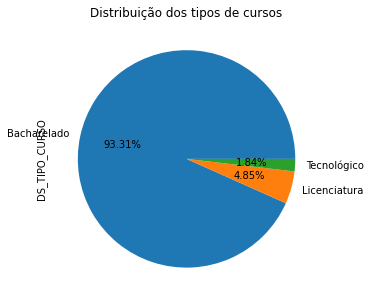

In [ ]:
plot = df16['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df16.CO_PROCESSO.value_counts()

255    328163
257    130611
256    126078
258     78118
249     52541
259     50916
260     40364
247     31439
244      7852
245      4748
248      3652
252      2040
262       852
261       845
253       604
263       378
254       206
251        87
250         1
Name: CO_PROCESSO, dtype: int64

In [ ]:
df16.NU_ANO_EXERCICIO_INSC.value_counts()

2014.0    355922
2015.0    171465
2013.0    158714
2016.0     86371
2017.0     60504
2012.0     25198
2011.0      1099
2010.0       188
2009.0        28
2008.0         3
2006.0         1
2002.0         1
2007.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df16.NU_PERCENTUAL_PROUNI.value_counts()

0,00     840292
50,00     19202
25,00         1
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df16.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100,00    580576
75,00      49711
50,00      42182
90,00      13187
95,00      11930
           ...  
18,00          4
17,00          4
7,00           3
11,00          2
14,00          1
Name: NU_PERCENT_SOLICITADO_FINANC, Length: 91, dtype: int64

In [ ]:
df16.VL_REPASSE.value_counts()

39190.88     311
42924.38     271
47945.89     237
30383.78     196
62244.24     186
            ... 
164497.96      1
37480.15       1
69505.55       1
68322.66       1
6673.28        1
Name: VL_REPASSE, Length: 656558, dtype: int64

In [ ]:
df16.VL_PERC_FINANCIAMENTO.value_counts()

100,00    580576
75,00      49711
50,00      42182
90,00      13187
95,00      11930
           ...  
18,00          4
17,00          4
7,00           3
11,00          2
14,00          1
Name: VL_PERC_FINANCIAMENTO, Length: 91, dtype: int64

In [ ]:
df16.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    434076
8.0     202211
9.0      71091
7.0      41340
6.0      32281
12.0     29714
11.0     21201
5.0      11140
4.0       9340
13.0      4328
3.0       1846
2.0        618
14.0       172
1.0         63
15.0        60
16.0         6
18.0         4
17.0         3
26.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df16.VL_REPASSE.sum()

36400530264.11

In [ ]:
df16.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

#SG_UF
SP   10445951585.050
MG    4879972278.130
RJ    2506103699.650
BA    2351349011.310
RS    2051229777.610
PR    1695118794.740
MT    1661898443.040
CE    1348187925.290
PB    1096707187.000
DF    1095868864.210
GO     939124758.870
PE     925518280.830
SC     871356157.150
ES     524995841.110
RN     468353651.800
SE     453988686.180
MA     451177258.440
PA     442434336.610
PI     404300860.810
RO     367938990.250
AM     358111991.050
AP     284143043.000
AC     279169931.350
MS     195580458.140
AL     176019202.920
RR      79781883.850
TO      46147365.720
Name: VL_REPASSE, dtype: float64

In [ ]:
df16_vl_estados_interativo = df16.groupby('#SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df16_vl_estados_interativo.index,
               y=df16_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df16.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        18357023403.940
NORDESTE        7675602064.580
SUL             4617704729.500
CENTRO-OESTE    3892472524.260
NORTE           1857727541.830
Name: VL_REPASSE, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             14070494079.280
Ciências Sociais Aplicadas    10480445030.320
Engenharias                    6989923576.150
Ciências Humanas               2654648086.960
Ciências Agrárias              1457621380.650
Ciências Exatas e da Terra      420692878.020
Linguística, Letras e Artes     183800540.230
Ciências Biológicas             142904692.500
Name: VL_REPASSE, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df16.VALOR_SEMESTRE_PAGO.sum()

5116427374.7699995

In [ ]:
df16.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

#SG_UF
SP   1464270460.950
MG    680997593.560
RJ    363276876.170
BA    330385242.210
RS    289330419.040
MT    233062052.930
PR    225289047.300
CE    188320881.730
PB    155654993.270
DF    149185443.180
PE    132529663.300
GO    130918003.860
SC    118451528.880
PA     74186148.200
ES     69922688.470
MA     66985865.390
RN     66254247.370
SE     63365614.770
PI     56834778.640
AM     55181238.490
RO     51046486.550
AP     40668623.230
AC     37935171.990
MS     26841471.830
AL     25207111.960
RR     11808543.900
TO      8517177.600
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df16_vl_estados_interativo = df16.groupby('#SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df16_vl_estados_interativo.index,
               y=df16_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df16.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2578467619.150
NORDESTE       1085538398.640
SUL             633070995.220
CENTRO-OESTE    540006971.800
NORTE           279343389.960
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1978349589.890
Ciências Sociais Aplicadas    1477114799.440
Engenharias                    962831443.240
Ciências Humanas               378693696.040
Ciências Agrárias              205796946.280
Ciências Exatas e da Terra      64294240.060
Linguística, Letras e Artes     27530895.440
Ciências Biológicas             21815764.380
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df16.VALOR_ARQUIVO_PAGO.sum()

5347389093.969999

In [ ]:
df16.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

#SG_UF
SP   1634140213.990
MG    687216880.200
RJ    368725437.180
BA    338283410.490
RS    291788267.940
MT    235996746.790
PR    231755472.540
CE    191299926.070
PB    157669827.770
DF    152096700.750
GO    140905804.650
PE    133903773.600
SC    119935965.390
PA     75326022.860
ES     70572310.420
MA     67531925.600
RN     66885504.140
SE     63953990.940
PI     58348770.750
AM     55759879.370
RO     52604100.920
AP     40942256.690
AC     38169163.900
MS     27517193.720
AL     25531674.480
RR     11974605.620
TO      8553267.200
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df16_vl_estados_interativo = df16.groupby('#SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df16_vl_estados_interativo.index,
               y=df16_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df16.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        2760654841.790
NORDESTE       1103408803.840
SUL             643479705.870
CENTRO-OESTE    556516445.910
NORTE           283329296.560
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2040064352.770
Ciências Sociais Aplicadas    1553474977.480
Engenharias                   1015047731.250
Ciências Humanas               406535793.780
Ciências Agrárias              212277172.990
Ciências Exatas e da Terra      67852484.370
Linguística, Letras e Artes     29504383.600
Ciências Biológicas             22632197.730
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df16_vl_regiao_interativo = df16.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df16_vl_regiao_interativo.index,
               y=df16_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")